Demo index
The demo #1 shows the approximation of a periodic function via Fourier series by applying the definition in the real form. Of course, summation cannot go all the way to infinity, so the summation cycles will have to be limited to a value of N
 not very large, for obvious performance reasons, but enough to have an acceptable approximation. As far as integral calculations are concerned, the SciPy library is used and in particular the quad function; please refer to the post Integral Calculus in Python on this site for details about integration in Python.

The demo #2 shows the approximation of the same periodic function but through Fourier series by applying the definition in the complex form. As for the calculations of complex integrals we use the SciPy library integrating separately the real and imaginary part.
The demo #3 shows the approximation of a complex-valued periodic function by Fourier series applying of course the definition in the complex form.

From an application point of view, you might wonder what is the point of approximating a function if you already know the function itself. The answer is simple (and the one provided here is not the only possible answer): in the real world, the periodic function may not be known but may be available in the form of discrete data (e.g., acquired via sensors or field measurements); in this case the approximation by Fourier series becomes very useful obviously by performing calculations of integrals using discrete integration techniques.
The demo #4 and the demo #5 show how to obtain the Fourier series starting from a discrete set of values (and therefore no longer from an analytical function given a priori); precisely the demo #4 operates on a real-valued dataset while the demo #4 on a complex-valued dataset.

The demo #6, the demo #7 and the demo #8 show how to compute the complex coefficients cn
 using the Fourier transform; in particular demo #6 applies to the continuous case and requires the use of integrals, while the other two apply to the discrete case and do not require integral calculus; in particular demo #8 uses the function of the SciPy library to compute the fast Fourier transform which is an optimized algorithm to compute the discrete Fourier transform efficiently.

The demo #9 and the demo #10 are like demo #6 and demo #8 but apply to a complex-valued function and a complex-valued discrete dataset, respectively.

The demo #11 and the demo #12 concern the two-dimensional Fourier series and apply respectively to the case of a real-valued function of two real variables and to a two-dimensional discrete dataset (in the sense of a set of points lying on a surface in three-dimensional space), respectively.

The reader is invited to generalize these cases, for example by extending demo #11 and demo #12 to the case of functions (or datasets) with complex values and/or to the n-dimensional case (where the vector notation is certainly more suitable than having a variable for each dimension).

C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\matplotlib\collections.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\matplotlib\collections.py:564: ComplexWarning: Casting complex values to real discards the imaginary part
  (np.asarray(self.convert_xunits(offsets[:, 0]), 'float'),
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\matplotlib\collections.py:565: ComplexWarning: Casting complex values to real discards the imaginary part
  np.asarray(self.convert_yunits(offsets[:, 1]), 'float')))
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\matplotlib\colors.py:277: ComplexWarning: Casting complex values to real discards the imaginary part
  c = tuple(ma

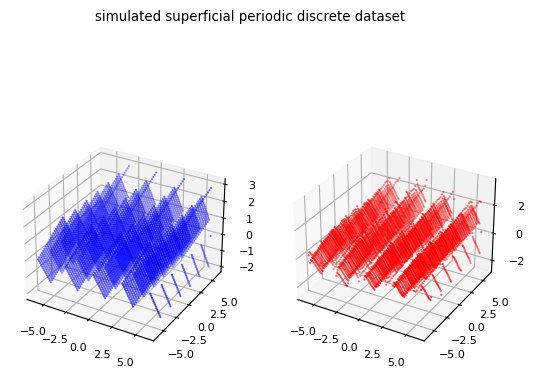

In [1]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
import scipy.fftpack as spf

#x and y arr the independent variables
PX= 3. #period value on x
PY= 2. #period value on y
BX=-6. #initian value of x,
BY=-6 #initian value of y
EX= 6 #final value of x
EY= 6 #final value of y
FSX=80 #number of discrete values of t between BX and EX
FSY=80 #number of discrete values of t between BY and EY

#the periodic real-valued function f(x,y) with periods PX and PY
f = lambda x, y: (x % PX) - (y % PY)

#all discrete values of x,y in the rectangle from [BX, EX] x [BY, EY]
x_range = np.linspace(BX, EX, FSX)
y_range = np.linspace(BY, EY, FSY)

xyz_true = np.array([[x, y, f(x, y)] for x in x_range for y in y_range])
#xyz_true[:, 2] contains the discrete values of f(x,y) in the rectangle

#function that computes the complex Fourier coefficients c-N,.., c0, .., cN by Discrete Fast Fourier Transform
def compute_complex_fourier_coeffs_from_discrete_set_by_fft2(z_dataset, N): #via tff N is up to nthHarmonic
    z_ds_transf = spf.fft2(z_dataset)

    KX = len(z_dataset)
    KY = len(z_dataset[0])
    K = min(KX, KY)
    if N % 2 == 0:
        if N >= K // 2:
            raise Exception(f"Argument exception: 'N' cannot be >= {K//2}")
    else:
        if N > K // 2:
            raise Exception(f"Argument exception: 'N' cannot be > {K//2}")

    result = []
    for n1 in range(-N, N+1):
        nested = []
        for n2 in range(-N, N+1):
            cn = (1./KX) * (1./KY) * z_ds_transf[n1, n2]
            nested.append(cn)
        result.append(np.array(nested))
    return np.array(result)

#function that computes the complex form Fourier series using cn coefficients in 2 variables
def fit_func2var_by_fourier_series_with_complex_coeffs(x, y, C):
    result = 0. + 0.j
    L = int((len(C) - 1) / 2)
    for n1 in range(-L, L+1):
        for n2 in range(-L, L+1):
            c = C[n1+L][n2+L]
            result +=  c \
                * np.exp(1j * 2. * np.pi * n1 * x / PX) \
                * np.exp(1j * 2. * np.pi * n2 * y / PY)
    return result

FDS=80 #number of discrete values of the dataset (that is long as a period)
x_period = np.arange(0, PX, PX/FDS)
y_period = np.arange(0, PY, PY/FDS)
#generation of discrete dataset
z_dataset = [[f(x, y) for y in y_period] for x in x_period]

plt.rcParams['font.size'] = 8
fig = plt.figure()
fig.suptitle('simulated superficial periodic discrete dataset')

#plot, in the range from BT to ET, the true f(t) in blue and the approximation in red
N = 24
C = compute_complex_fourier_coeffs_from_discrete_set_by_fft2(z_dataset, N)
#C contains te list of cn complex coefficients for n in 1..N interval.

xyz_approx = []
for x in x_range:
    for y in y_range:
        xyz_approx.append([x, y, fit_func2var_by_fourier_series_with_complex_coeffs(x, y, C)])
xyz_approx = np.array(xyz_approx)
#xyz_approx[:, 2] contains the discrete values of approximation obtained by the Fourier series

#plot the true f(x,y) in blue and the approximation in red
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter3D(xyz_true[:, 0], xyz_true[:, 1], xyz_true[:, 2], color='blue', s=1, marker='.');
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter3D(xyz_approx[:, 0], xyz_approx[:, 1], xyz_approx[:, 2], color='red', s=1, marker='.');

plt.show()

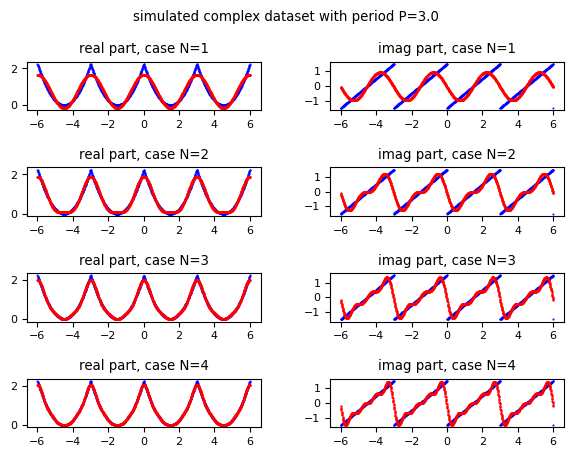

In [2]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
import scipy.fftpack as spf

#t is the independent variable
P = 3. #period value
BT=-6. #initian value of t (time begin)
ET=6. #final value of t (time end)
FS=1000 #number of discrete values of t between BT and ET

#the periodic complex-valued function f(t) with period equal to P
f = lambda t: ((t % P) - P/2.) ** 2 + ((t % P) -P/2.) * 1j
t_range = np.linspace(BT, ET, FS) #all discrete values of t in the interval from BT and ET
y_true = f(t_range) #the true f(t)
y_true_real = [y.real for y in y_true]
y_true_imag = [y.imag for y in y_true]

#function that computes the complex Fourier coefficients c-N,.., c0, .., cN by Discrete Fast Fourier Transform
def compute_complex_fourier_coeffs_from_discrete_set_by_fft(y_dataset, N): #via tff N is up to nthHarmonic
    result = []
    y_ds_transf = spf.fft(y_dataset)

    K = len(y_dataset)
    if N % 2 == 0:
        if N >= K // 2:
            raise Exception(f"Argument exception: 'N' cannot be >= {K//2}")
    else:
        if N > K // 2:
            raise Exception(f"Argument exception: 'N' cannot be > {K//2}")

    for n in range(-N, N+1):
        cn = (1./K) * y_ds_transf[n]
        result.append(cn)
    return np.array(result)

#function that computes the complex form Fourier series using cn coefficients
def fit_func_by_fourier_series_with_complex_coeffs(t, C):
    result = 0. + 0.j
    L = int((len(C) - 1) / 2)
    for n in range(-L, L+1):
        c = C[n+L]
        result +=  c * np.exp(1j * 2. * np.pi * n * t / P)
    return result

FDS=20. #number of discrete values of the dataset (that is long as a period)
t_period = np.arange(0, P, 1/FDS)
y_dataset = f(t_period) #generation of discrete dataset

maxN=4
COLs = 2 #cols of plt
ROWs = maxN #rows of plt
plt.rcParams['font.size'] = 8
fig, axs = plt.subplots(ROWs, COLs)
fig.tight_layout(rect=[0, 0, 1, 0.95], pad=3.0)
fig.suptitle('simulated complex dataset with period P=' + str(P))

#plot, in the range from BT to ET, the true f(t) in blue and the approximation in red
for N in range(1, maxN + 1):
    C = compute_complex_fourier_coeffs_from_discrete_set_by_fft(y_dataset, N)
    #C contains the list of cn complex coefficients for n in 1..N interval.

    y_approx = fit_func_by_fourier_series_with_complex_coeffs(t_range, C)
    #y_approx contains the discrete values of approximation obtained by the Fourier series

    y_approx_real = [y.real for y in y_approx]
    y_approx_imag = [y.imag for y in y_approx]
    row = (N-1)
    axs[row, 0].set_title('real part, case N=' + str(N))
    axs[row, 1].set_title('imag part, case N=' + str(N))
    axs[row, 0].scatter(t_range, y_true_real, color='blue', s=1, marker='.')
    axs[row, 0].scatter(t_range, y_approx_real, color='red', s=2, marker='.')
    axs[row, 1].scatter(t_range, y_true_imag, color='blue', s=1, marker='.')
    axs[row, 1].scatter(t_range, y_approx_imag, color='red', s=2, marker='.')
plt.show()

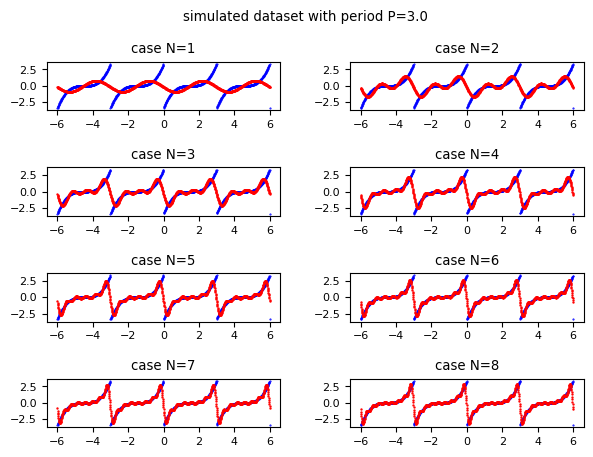

In [3]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

#t is the independent variable
P = 3. #period value
BT=-6. #initian value of t (time begin)
ET=6. #final value of t (time end)
FS=1000 #number of discrete values of t between BT and ET

#the periodic real-valued function f(t) with period equal to P to simulate an acquired dataset
f = lambda t: ((t % P) - (P / 2.)) ** 3
t_range = np.linspace(BT, ET, FS) #all discrete values of t in the interval from BT and ET
y_true = f(t_range) #the true f(t)

#function that computes the complex fourier coefficients c-N,.., c0, .., cN
def compute_complex_fourier_coeffs_from_discrete_set(y_dataset, N): #via Riemann sum; N is up to nthHarmonic
    result = []
    T = len(y_dataset)
    t = np.arange(T)
    for n in range(-N, N+1):
        cn = (1./T) * (y_dataset * np.exp(-1j * 2 * np.pi * n * t / T)).sum()
        result.append(cn)
    return np.array(result)

#function that computes the complex form Fourier series using cn coefficients
def fit_func_by_fourier_series_with_complex_coeffs(t, C):
    result = 0. + 0.j
    L = int((len(C) - 1) / 2)
    for n in range(-L, L+1):
        c = C[n+L]
        result +=  c * np.exp(1j * 2. * np.pi * n * t / P)
    return result

FDS=20. #number of discrete values of the dataset (that is long as a period)
t_period = np.arange(0, P, 1/FDS)
y_dataset = f(t_period) #generation of discrete dataset

maxN=8
COLs = 2 #cols of plt
ROWs = 1 + (maxN-1) // COLs #rows of plt
plt.rcParams['font.size'] = 8
fig, axs = plt.subplots(ROWs, COLs)
fig.tight_layout(rect=[0, 0, 1, 0.95], pad=3.0)
fig.suptitle('simulated dataset with period P=' + str(P))

#plot, in the range from BT to ET, the true f(t) in blue and the approximation in red
for N in range(1, maxN + 1):
    C = compute_complex_fourier_coeffs_from_discrete_set(y_dataset, N)
    #C contains the list of cn complex coefficients for n in 1..N interval.

    y_approx = fit_func_by_fourier_series_with_complex_coeffs(t_range, C) #y_approx contains the discrete values of approximation obtained by the Fourier series
    #y_approx contains the discrete values of approximation obtained by the Fourier series

    row = (N-1) // COLs
    col = (N-1) % COLs
    axs[row, col].set_title('case N=' + str(N))
    axs[row, col].scatter(t_range, y_true, color='blue', s=1, marker='.')
    axs[row, col].scatter(t_range, y_approx, color='red', s=2, marker='.')
plt.show()

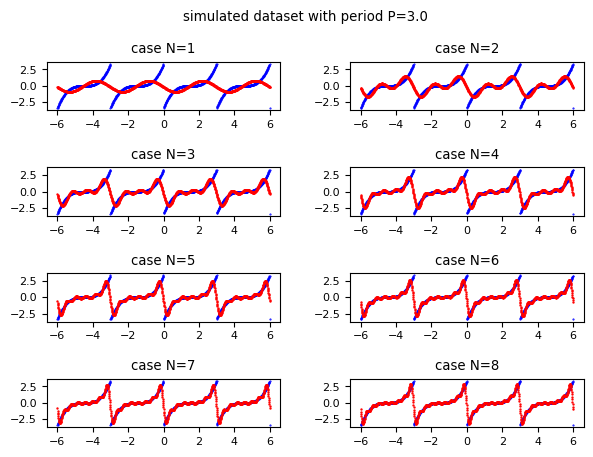

In [4]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

#t is the independent variable
P = 3. #period value
BT=-6. #initian value of t (begin)
ET=6. #final value of t (end))
FS=1000 #number of discrete values of t between BT and ET

#the periodic real-valued function f(t) with period equal to P to simulate an acquired dataset
f = lambda t: ((t % P) - (P / 2.)) ** 3
t_range = np.linspace(BT, ET, FS) #all discrete values of t in the interval from BT and ET
y_true = f(t_range) #the true f(t)

#function that computes the real fourier couples of coefficients (a0, 0), (a1, b1)...(aN, bN)
def compute_real_fourier_coeffs_from_discrete_set(y_dataset, N):
    result = []
    T = len(y_dataset)
    t = np.arange(T)
    for n in range(N+1):
        an = (2./T) * (y_dataset * np.cos(2 * np.pi * n * t / T)).sum()
        bn = (2./T) * (y_dataset * np.sin(2 * np.pi * n * t / T)).sum()
        result.append((an, bn))
    return np.array(result)

#function that computes the real form Fourier series using an and bn coefficients
def fit_func_by_fourier_series_with_real_coeffs(t, AB):
    result = 0.
    A = AB[:,0]
    B = AB[:,1]
    for n in range(0, len(AB)):
        if n > 0:
            result +=  A[n] * np.cos(2. * np.pi * n * t / P) + B[n] * np.sin(2. * np.pi * n * t / P)
        else:
            result +=  A[0]/2.
    return result

FDS=20. #number of discrete values of the dataset (that is long as a period)
t_period = np.arange(0, P, 1/FDS)
y_dataset = f(t_period) #generation of discrete dataset

maxN=8
COLs = 2 #cols of plt
ROWs = 1 + (maxN-1) // COLs #rows of plt
plt.rcParams['font.size'] = 8
fig, axs = plt.subplots(ROWs, COLs)
fig.tight_layout(rect=[0, 0, 1, 0.95], pad=3.0)
fig.suptitle('simulated dataset with period P=' + str(P))

#plot, in the range from BT to ET, the true f(t) in blue and the approximation in red
for N in range(1, maxN + 1):
    AB = compute_real_fourier_coeffs_from_discrete_set(y_dataset, N)
    #AB contains the list of couples of (an, bn) coefficients for n in 1..N interval.

    y_approx = fit_func_by_fourier_series_with_real_coeffs(t_range, AB)
    #y_approx contains the discrete values of approximation obtained by the Fourier series

    row = (N-1) // COLs
    col = (N-1) % COLs
    axs[row, col].set_title('case N=' + str(N))
    axs[row, col].scatter(t_range, y_true, color='blue', s=1, marker='.')
    axs[row, col].scatter(t_range, y_approx, color='red', s=2, marker='.')
plt.show()

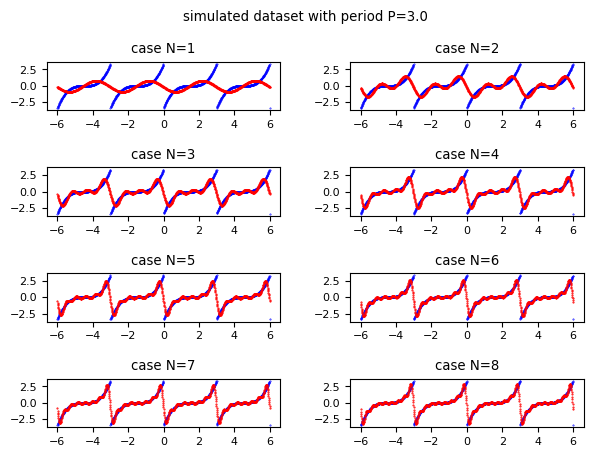

In [5]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

#t is the independent variable
P = 3. #period value
BT=-6. #initian value of t (time begin)
ET=6. #final value of t (time end)
FS=1000 #number of discrete values of t between BT and ET

#the periodic real-valued function f(t) with period equal to P to simulate an acquired dataset
f = lambda t: ((t % P) - (P / 2.)) ** 3
t_range = np.linspace(BT, ET, FS) #all discrete values of t in the interval from BT and ET
y_true = f(t_range) #the true f(t)

#function that computes the discrete fourier transform
def compute_discrete_fourier_transform(y_dataset, t):
    K = len(y_dataset)
    result = 0. + 0.j
    for k in range(0, K):
        result += y_dataset[k] * np.exp((-1.j * 2 * np.pi * t * k) / K)
    return result

#function that computes the complex Fourier coefficients c-N,.., c0, .., cN by Discrete Fourier Transform
def compute_complex_fourier_coeffs_from_discrete_set_by_dft(y_dataset, N):
    result = []
    K = len(y_dataset)
    for n in range(-N, N+1):
        cn = (1./K) * compute_discrete_fourier_transform(y_dataset, n)
        result.append(cn)
    return np.array(result)

#function that computes the complex form Fourier series using cn coefficients
def fit_func_by_fourier_series_with_complex_coeffs(t, C):
    result = 0. + 0.j
    L = int((len(C) - 1) / 2)
    for n in range(-L, L+1):
        c = C[n+L]
        result +=  c * np.exp(1j * 2. * np.pi * n * t / P)
    return result

FDS=20. #number of discrete values of the dataset (that is long as a period)
t_period = np.arange(0, P, 1/FDS)
y_dataset = f(t_period) #generation of discrete dataset

maxN=8
COLs = 2 #cols of plt
ROWs = 1 + (maxN-1) // COLs #rows of plt
plt.rcParams['font.size'] = 8
fig, axs = plt.subplots(ROWs, COLs)
fig.tight_layout(rect=[0, 0, 1, 0.95], pad=3.0)
fig.suptitle('simulated dataset with period P=' + str(P))

#plot, in the range from BT to ET, the true f(t) in blue and the approximation in red
for N in range(1, maxN + 1):
    C = compute_complex_fourier_coeffs_from_discrete_set_by_dft(y_dataset, N)
    #C contains the list of cn complex coefficients for n in 1..N interval
    y_approx = fit_func_by_fourier_series_with_complex_coeffs(t_range, C)
    #y_approx contains the discrete values of approximation obtained by the Fourier series

    row = (N-1) // COLs
    col = (N-1) % COLs
    axs[row, col].set_title('case N=' + str(N))
    axs[row, col].scatter(t_range, y_true, color='blue', s=0.15, marker='o')
    axs[row, col].scatter(t_range, y_approx, color='red', s=0.25, marker='o')
plt.show()

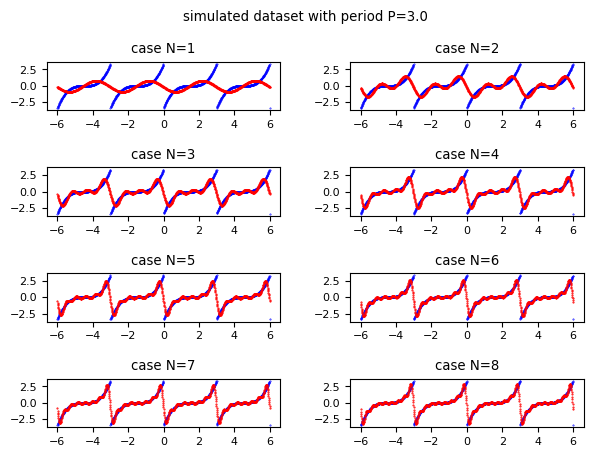

In [6]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
import scipy.fftpack as spf

#t is the independent variable
P = 3. #period value
BT=-6. #initian value of t (time begin)
ET=6. #final value of t (time end)
FS=1000 #number of discrete values of t between BT and ET

#the periodic real-valued function f(t) with period equal to P to simulate an acquired dataset
f = lambda t: ((t % P) - (P / 2.)) ** 3
t_range = np.linspace(BT, ET, FS) #all discrete values of t in the interval from BT and ET
y_true = f(t_range) #the true f(t)

#function that computes the complex Fourier coefficients c-N,.., c0, .., cN by Discrete Fast Fourier Transform
def compute_complex_fourier_coeffs_from_discrete_set_by_fft(y_dataset, N): #via tff N is up to nthHarmonic
    result = []
    y_ds_transf = spf.fft(y_dataset)

    K = len(y_dataset)
    if N % 2 == 0:
        if N >= K // 2:
            raise Exception(f"Argument exception: 'N' cannot be >= {K//2}")
    else:
        if N > K // 2:
            raise Exception(f"Argument exception: 'N' cannot be > {K//2}")

    for n in range(-N, N+1):
        cn = (1./K) * y_ds_transf[n]
        result.append(cn)
    return np.array(result)

#function that computes the complex form Fourier series using cn coefficients
def fit_func_by_fourier_series_with_complex_coeffs(t, C):
    result = 0. + 0.j
    L = int((len(C) - 1) / 2)
    for n in range(-L, L+1):
        c = C[n+L]
        result +=  c * np.exp(1j * 2. * np.pi * n * t / P)
    return result

FDS=20. #number of discrete values of the dataset (that is long as a period)
t_period = np.arange(0, P, 1/FDS)
y_dataset = f(t_period) #generation of discrete dataset

maxN=8
COLs = 2 #cols of plt
ROWs = 1 + (maxN-1) // COLs #rows of plt
plt.rcParams['font.size'] = 8
fig, axs = plt.subplots(ROWs, COLs)
fig.tight_layout(rect=[0, 0, 1, 0.95], pad=3.0)
fig.suptitle('simulated dataset with period P=' + str(P))

#plot, in the range from BT to ET, the true f(t) in blue and the approximation in red
for N in range(1, maxN + 1):
    C = compute_complex_fourier_coeffs_from_discrete_set_by_fft(y_dataset, N)
    #C contains the list of cn complex coefficients for n in 1..N interval.

    y_approx = fit_func_by_fourier_series_with_complex_coeffs(t_range, C)
    #y_approx contains the discrete values of approximation obtained by the Fourier series

    row = (N-1) // COLs
    col = (N-1) % COLs
    axs[row, col].set_title('case N=' + str(N))
    axs[row, col].scatter(t_range, y_true, color='blue', s=0.15, marker='o')
    axs[row, col].scatter(t_range, y_approx, color='red', s=0.25, marker='o')
plt.show()

In [ ]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#x and y arr the independent variables
PX= 3.#period value on x
PY= 2. #period value on y
BX=-6. #initian value of x,
BY=-6. #initian value of y
EX= 6. #final value of x
EY= 6. #final value of y
FSX=80 #number of discrete values of t between BX and EX
FSY=80 #number of discrete values of t between BY and EY

#the periodic real-valued function f(x,y) with periods PX and PY
f = lambda x, y: (x % PX) - (y % PY)

#all discrete values of x,y in the rectangle from [BX, EX] x [BY, EY]
x_range = np.linspace(BX, EX, FSX)
y_range = np.linspace(BY, EY, FSY)

xyz_true = np.array([[x, y, f(x, y)] for x in x_range for y in y_range])
#xyz_true[:, 2] contains the discrete values of f(x,y) in the rectangle

#function to integrate on complex field
def complex_dblquad(func, a, b, gfun, hfun, **kwargs):
    def real_func(x, y):
        return np.real(func(x, y))
    def imag_func(x, y):
        return np.imag(func(x, y))
    real_integral = spi.dblquad(real_func, a, b, gfun, hfun, **kwargs)
    imag_integral = spi.dblquad(imag_func, a, b, gfun, hfun, **kwargs)
    integral = (real_integral[0] + 1j*imag_integral[0], real_integral[1:], imag_integral[1:])
    return integral

#function that computes the complex fourier coefficients c-N,.., c0, .., cN
def compute_complex_fourier_coeffs(func, N):
    result = []
    for n1 in range(-N, N+1):
        nested = []
        for n2 in range(-N, N+1):
            cn = (1./PX) * (1./PY) * complex_dblquad(
                lambda y, x: func(x, y) \
                    * np.exp(-1j * 2 * np.pi * n1 * x / PX) \
                    * np.exp(-1j * 2 * np.pi * n2 * y / PY),
                0, PX, lambda x: 0, lambda x: PY)[0]
            nested.append(cn)
        result.append(np.array(nested))
    return np.array(result)

#function that computes the complex form Fourier series using cn coefficients in 2 variables
def fit_func2var_by_fourier_series_with_complex_coeffs(x, y, C):
    result = 0. + 0.j
    L = int((len(C) - 1) / 2)
    for n1 in range(-L, L+1):
        for n2 in range(-L, L+1):
            c = C[n1+L][n2+L]
            result +=  c \
                * np.exp(1j * 2. * np.pi * n1 * x / PX) \
                * np.exp(1j * 2. * np.pi * n2 * y / PY)
    return result

N=20
plt.rcParams['font.size'] = 8
fig = plt.figure()
fig.suptitle('f(x, y) = (x mod PX) - (y mod PY) where PX=3 and PY=2')

C = compute_complex_fourier_coeffs(f, N)
#C contains the matrix of cn coefficients for (n1, n2) in [1, N] x [1, N]???

xyz_approx = []
for x in x_range:
    for y in y_range:
        xyz_approx.append([x, y, fit_func2var_by_fourier_series_with_complex_coeffs(x, y, C)])
xyz_approx = np.array(xyz_approx)
#xyz_approx[:, 2] contains the discrete values of approximation obtained by the Fourier series

#plot the true f(x,y) in blue and the approximation in red
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter3D(xyz_true[:, 0], xyz_true[:, 1], xyz_true[:, 2], color='blue', s=1, marker='.');
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter3D(xyz_approx[:, 0], xyz_approx[:, 1], xyz_approx[:, 2], color='red', s=1, marker='.');

plt.show()

In [ ]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

#t is the independent variable
P = 3. #period value
BT=-6. #initian value of t (begin time)
ET=6. #final value of t (end time)
FS=1000 #number of discrete values of t between BT and ET

#the periodic complex-valued function f(t) with period equal to P
f = lambda t: ((t % P) - P/2.) ** 2 + ((t % P) -P/2.) * 1j

#all discrete values of t in the interval from BT and ET
t_range = np.linspace(BT, ET, FS)
y_true = f(t_range) #the true f(t)
y_true_real = [y.real for y in y_true]
y_true_imag = [y.imag for y in y_true]

#function to integrate on complex field
def complex_quad(func, a, b, **kwargs):
    def real_func(x):
        return np.real(func(x))
    def imag_func(x):
        return np.imag(func(x))
    real_integral = spi.quad(real_func, a, b, **kwargs)
    imag_integral = spi.quad(imag_func, a, b, **kwargs)
    integral = (real_integral[0] + 1j*imag_integral[0], real_integral[1:], imag_integral[1:])
    return integral

#function that computes the complex fourier coefficients c-N,.., c0, .., cN
def compute_complex_fourier_coeffs(func, N):
    result = []
    for n in range(-N, N+1):
        cn = (1./P) * complex_quad(lambda t: func(t) * np.exp(-1j * 2 * np.pi * n * t / P), 0, P)[0]
        result.append(cn)
    return np.array(result)

#function that computes the complex form Fourier series using cn coefficients
def fit_func_by_fourier_series_with_complex_coeffs(t, C):
    result = 0. + 0.j
    L = int((len(C) - 1) / 2)
    for n in range(-L, L+1):
        c = C[n+L]
        result +=  c * np.exp(1j * 2. * np.pi * n * t / P)
    return result

maxN=4
COLs = 2 #cols of plt
ROWs = maxN #rows of plt
plt.rcParams['font.size'] = 8
fig, axs = plt.subplots(ROWs, COLs)
fig.tight_layout(rect=[0, 0, 1, 0.95], pad=3.0)
fig.suptitle('f(t) = ((t % P) - (P / 2.)) ** 2 + ((t % P) - (P / 2.))j where P=' + str(P))

#plot, in the range from BT to ET, the true f(t) in blue and the approximation in red
for N in range(1, maxN + 1):
    C = compute_complex_fourier_coeffs(f, N)
    #C contains the list of cn complex coefficients for n in 1..N interval.

    y_approx = fit_func_by_fourier_series_with_complex_coeffs(t_range, C)
    #y_approx contains the discrete values of approximation obtained by the Fourier series

    y_approx_real = [y.real for y in y_approx]
    y_approx_imag = [y.imag for y in y_approx]
    row = (N-1)
    axs[row, 0].set_title('real part, case N=' + str(N))
    axs[row, 1].set_title('imag part, case N=' + str(N))
    axs[row, 0].scatter(t_range, y_true_real, color='blue', s=1, marker='.')
    axs[row, 0].scatter(t_range, y_approx_real, color='red', s=2, marker='.')
    axs[row, 1].scatter(t_range, y_true_imag, color='blue', s=1, marker='.')
    axs[row, 1].scatter(t_range, y_approx_imag, color='red', s=2, marker='.')
plt.show()

In [ ]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

#t is the independent variable
P = 3. #period value
BT=-6. #initian value of t (begin time)
ET=6. #final value of t (end time)
FS=1000 #number of discrete values of t between BT and ET

#the periodic complex-valued function f(t) with period equal to P
f = lambda t: ((t % P) - P/2.) ** 2 + ((t % P) -P/2.) * 1j

#all discrete values of t in the interval from BT and ET
t_range = np.linspace(BT, ET, FS)
y_true = f(t_range) #the true f(t)
y_true_real = [y.real for y in y_true]
y_true_imag = [y.imag for y in y_true]

#function to integrate on complex field
def complex_quad(func, a, b, **kwargs):
    def real_func(x):
        return np.real(func(x))
    def imag_func(x):
        return np.imag(func(x))
    real_integral = spi.quad(real_func, a, b, **kwargs)
    imag_integral = spi.quad(imag_func, a, b, **kwargs)
    integral = (real_integral[0] + 1j*imag_integral[0], real_integral[1:], imag_integral[1:])
    return integral

def compute_fourier_transform(func, omega):
    return complex_quad(lambda t: func(t) * np.exp(-1j * omega * t), 0, P)[0]

#function that computes the complex Fourier coefficients c-N,.., c0, .., cN by Fourier transform
def compute_complex_fourier_coeffs_by_fourier_transform(func, N):
    result = []
    omega0 = (2. * np.pi) / P
    for n in range(-N, N+1):
        omega = n * omega0
        cn = (1./P) * compute_fourier_transform(func, omega)
        result.append(cn)
    return np.array(result)

#function that computes the complex form Fourier series using cn coefficients
def fit_func_by_fourier_series_with_complex_coeffs(t, C):
    result = 0. + 0.j
    L = int((len(C) - 1) / 2)
    for n in range(-L, L+1):
        c = C[n+L]
        result +=  c * np.exp(1j * 2. * np.pi * n * t / P)
    return result

maxN=4
COLs = 2 #cols of plt
ROWs = maxN #rows of plt
plt.rcParams['font.size'] = 8
fig, axs = plt.subplots(ROWs, COLs)
fig.tight_layout(rect=[0, 0, 1, 0.95], pad=3.0)
fig.suptitle('f(t) = ((t % P) - (P / 2.)) ** 2 + ((t % P) - (P / 2.))j where P=' + str(P))

#plot, in the range from BT to ET, the true f(t) in blue and the approximation in red
for N in range(1, maxN + 1):
    C = compute_complex_fourier_coeffs_by_fourier_transform(f, N)
    #C contains the list of cn complex coefficients for n in 1..N interval.

    y_approx = fit_func_by_fourier_series_with_complex_coeffs(t_range, C)
    #y_approx contains the discrete values of approximation obtained by the Fourier series

    y_approx_real = [y.real for y in y_approx]
    y_approx_imag = [y.imag for y in y_approx]
    row = (N-1)
    axs[row, 0].set_title('real part, case N=' + str(N))
    axs[row, 1].set_title('imag part, case N=' + str(N))
    axs[row, 0].scatter(t_range, y_true_real, color='blue', s=1, marker='.')
    axs[row, 0].scatter(t_range, y_approx_real, color='red', s=2, marker='.')
    axs[row, 1].scatter(t_range, y_true_imag, color='blue', s=1, marker='.')
    axs[row, 1].scatter(t_range, y_approx_imag, color='red', s=2, marker='.')
plt.show()

In [ ]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

#t is the independent variable
P = 3. #period value
BT=-6. #initian value of t (begin time)
ET=6. #final value of t (end time)
FS=1000 #number of discrete values of t between BT and ET

#the periodic complex-valued function f(t) with period equal to P
f = lambda t: ((t % P) - P/2.) ** 2 + ((t % P) -P/2.) * 1j

#all discrete values of t in the interval from BT and ET
t_range = np.linspace(BT, ET, FS)
y_true = f(t_range) #the true f(t)
y_true_real = [y.real for y in y_true]
y_true_imag = [y.imag for y in y_true]

#function to integrate on complex field
def complex_quad(func, a, b, **kwargs):
    def real_func(x):
        return np.real(func(x))
    def imag_func(x):
        return np.imag(func(x))
    real_integral = spi.quad(real_func, a, b, **kwargs)
    imag_integral = spi.quad(imag_func, a, b, **kwargs)
    integral = (real_integral[0] + 1j*imag_integral[0], real_integral[1:], imag_integral[1:])
    return integral

def compute_fourier_transform(func, omega):
    return complex_quad(lambda t: func(t) * np.exp(-1j * omega * t), 0, P)[0]

#function that computes the complex Fourier coefficients c-N,.., c0, .., cN by Fourier transform
def compute_complex_fourier_coeffs_by_fourier_transform(func, N):
    result = []
    omega0 = (2. * np.pi) / P
    for n in range(-N, N+1):
        omega = n * omega0
        cn = (1./P) * compute_fourier_transform(func, omega)
        result.append(cn)
    return np.array(result)

#function that computes the complex form Fourier series using cn coefficients
def fit_func_by_fourier_series_with_complex_coeffs(t, C):
    result = 0. + 0.j
    L = int((len(C) - 1) / 2)
    for n in range(-L, L+1):
        c = C[n+L]
        result +=  c * np.exp(1j * 2. * np.pi * n * t / P)
    return result

maxN=4
COLs = 2 #cols of plt
ROWs = maxN #rows of plt
plt.rcParams['font.size'] = 8
fig, axs = plt.subplots(ROWs, COLs)
fig.tight_layout(rect=[0, 0, 1, 0.95], pad=3.0)
fig.suptitle('f(t) = ((t % P) - (P / 2.)) ** 2 + ((t % P) - (P / 2.))j where P=' + str(P))

#plot, in the range from BT to ET, the true f(t) in blue and the approximation in red
for N in range(1, maxN + 1):
    C = compute_complex_fourier_coeffs_by_fourier_transform(f, N)
    #C contains the list of cn complex coefficients for n in 1..N interval.

    y_approx = fit_func_by_fourier_series_with_complex_coeffs(t_range, C)
    #y_approx contains the discrete values of approximation obtained by the Fourier series

    y_approx_real = [y.real for y in y_approx]
    y_approx_imag = [y.imag for y in y_approx]
    row = (N-1)
    axs[row, 0].set_title('real part, case N=' + str(N))
    axs[row, 1].set_title('imag part, case N=' + str(N))
    axs[row, 0].scatter(t_range, y_true_real, color='blue', s=1, marker='.')
    axs[row, 0].scatter(t_range, y_approx_real, color='red', s=2, marker='.')
    axs[row, 1].scatter(t_range, y_true_imag, color='blue', s=1, marker='.')
    axs[row, 1].scatter(t_range, y_approx_imag, color='red', s=2, marker='.')
plt.show()

In [ ]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

#t is the independent variable
P = 3. #period value
BT=-6. #initian value of t (begin time)
ET=6. #final value of t (end time)
FS=1000 #number of discrete values of t between BT and ET

#the periodic real-valued function f(t) with period equal to P
f = lambda t: ((t % P) - (P / 2.)) ** 3

#all discrete values of t in the interval from BT and ET
t_range = np.linspace(BT, ET, FS)
y_true = f(t_range) #the true f(t)

#function to integrate on complex field
def complex_quad(func, a, b, **kwargs):
    def real_func(x):
        return np.real(func(x))
    def imag_func(x):
        return np.imag(func(x))
    real_integral = spi.quad(real_func, a, b, **kwargs)
    imag_integral = spi.quad(imag_func, a, b, **kwargs)
    integral = (real_integral[0] + 1j*imag_integral[0], real_integral[1:], imag_integral[1:])
    return integral

#function that computes the complex fourier coefficients c-N,.., c0, .., cN
def compute_complex_fourier_coeffs(func, N):
    result = []
    for n in range(-N, N+1):
        cn = (1./P) * complex_quad(lambda t: func(t) * np.exp(-1j * 2 * np.pi * n * t / P), 0, P)[0]
        result.append(cn)
    return np.array(result)

#function that computes the complex form Fourier series using cn coefficients
def fit_func_by_fourier_series_with_complex_coeffs(t, C):
    result = 0. + 0.j
    L = int((len(C) - 1) / 2)
    for n in range(-L, L+1):
        c = C[n+L]
        result +=  c * np.exp(1j * 2. * np.pi * n * t / P)
    return result

maxN=8
COLs = 2 #cols of plt
ROWs = 1 + (maxN-1) // COLs #rows of plt
plt.rcParams['font.size'] = 8
fig, axs = plt.subplots(ROWs, COLs)
fig.tight_layout(rect=[0, 0, 1, 0.95], pad=3.0)
fig.suptitle('f(t) = ((t % P) - (P / 2.)) ** 3 where P=' + str(P))

#plot, in the range from BT to ET, the true f(t) in blue and the approximation in red
for N in range(1, maxN + 1):
    C = compute_complex_fourier_coeffs(f, N)
    #C contains the list of cn complex coefficients for n in 1..N interval.

    y_approx = fit_func_by_fourier_series_with_complex_coeffs(t_range, C)
    #y_approx contains the discrete values of approximation obtained by the Fourier series

    row = (N-1) // COLs
    col = (N-1) % COLs
    axs[row, col].set_title('case N=' + str(N))
    axs[row, col].scatter(t_range, y_true, color='blue', s=1, marker='.')
    axs[row, col].scatter(t_range, y_approx, color='red', s=2, marker='.')
plt.show()

In [ ]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

#t is the independent variable
P = 3. #period value
BT=-6. #initian value of t (begin time)
ET=6. #final value of t (end time)
FS=1000 #number of discrete values of t between BT and ET

#the periodic real-valued function f(t) with period equal to P
f = lambda t: ((t % P) - (P / 2.)) ** 3

#all discrete values of t in the interval from BT and ET
t_range = np.linspace(BT, ET, FS)
y_true = f(t_range) #the true f(t)

#function that computes the real fourier couples of coefficients (a0, 0), (a1, b1)...(aN, bN)
def compute_real_fourier_coeffs(func, N):
    result = []
    for n in range(N+1):
        an = (2./P) * spi.quad(lambda t: func(t) * np.cos(2 * np.pi * n * t / P), 0, P)[0]
        bn = (2./P) * spi.quad(lambda t: func(t) * np.sin(2 * np.pi * n * t / P), 0, P)[0]
        result.append((an, bn))
    return np.array(result)

#function that computes the real form Fourier series using an and bn coefficients
def fit_func_by_fourier_series_with_real_coeffs(t, AB):
    result = 0.
    A = AB[:,0]
    B = AB[:,1]
    for n in range(0, len(AB)):
        if n > 0:
            result +=  A[n] * np.cos(2. * np.pi * n * t / P) + B[n] * np.sin(2. * np.pi * n * t / P)
        else:
            result +=  A[0]/2.
    return result

maxN=8
COLs = 2 #cols of plt
ROWs = 1 + (maxN-1) // COLs #rows of plt
plt.rcParams['font.size'] = 8
fig, axs = plt.subplots(ROWs, COLs)
fig.tight_layout(rect=[0, 0, 1, 0.95], pad=3.0)
fig.suptitle('f(t) = ((t % P) - (P / 2.)) ** 3 where P=' + str(P))

#plot, in the range from BT to ET, the true f(t) in blue and the approximation in red
for N in range(1, maxN + 1):
    AB = compute_real_fourier_coeffs(f, N)
    #AB contains the list of couples of (an, bn) coefficients for n in 1..N interval.

    y_approx = fit_func_by_fourier_series_with_real_coeffs(t_range, AB)
    #y_approx contains the discrete values of approximation obtained by the Fourier series

    row = (N-1) // COLs
    col = (N-1) % COLs
    axs[row, col].set_title('case N=' + str(N))
    axs[row, col].scatter(t_range, y_true, color='blue', s=1, marker='.')
    axs[row, col].scatter(t_range, y_approx, color='red', s=2, marker='.')
plt.show()

In [ ]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

#t is the independent variable
P = 3. #period value
BT=-6. #initian value of t (begin time)
ET=6. #final value of t (end time)
FS=1000 #number of discrete values of t between BT and ET

#the periodic real-valued function f(t) with period equal to P
f = lambda t: ((t % P) - (P / 2.)) ** 3

#all discrete values of t in the interval from BT and ET
t_range = np.linspace(BT, ET, FS)
y_true = f(t_range) #the true f(t)

#function to integrate on complex field
def complex_quad(func, a, b, **kwargs):
    def real_func(x):
        return np.real(func(x))
    def imag_func(x):
        return np.imag(func(x))
    real_integral = spi.quad(real_func, a, b, **kwargs)
    imag_integral = spi.quad(imag_func, a, b, **kwargs)
    integral = (real_integral[0] + 1j*imag_integral[0], real_integral[1:], imag_integral[1:])
    return integral

def compute_fourier_transform(func, omega):
    return complex_quad(lambda t: func(t) * np.exp(-1j * omega * t), 0, P)[0]

#function that computes the complex Fourier coefficients c-N,.., c0, .., cN by Fourier transform
def compute_complex_fourier_coeffs_by_fourier_transform(func, N):
    result = []
    omega0 = (2. * np.pi) / P
    for n in range(-N, N+1):
        omega = n * omega0
        cn = (1./P) * compute_fourier_transform(func, omega)
        result.append(cn)
    return np.array(result)

#function that computes the complex form Fourier series using cn coefficients
def fit_func_by_fourier_series_with_complex_coeffs(t, C):
    result = 0. + 0.j
    L = int((len(C) - 1) / 2)
    for n in range(-L, L+1):
        c = C[n+L]
        result +=  c * np.exp(1j * 2. * np.pi * n * t / P)
    return result

maxN=8
COLs = 2 #cols of plt
ROWs = 1 + (maxN-1) // COLs #rows of plt
plt.rcParams['font.size'] = 8
fig, axs = plt.subplots(ROWs, COLs)
fig.tight_layout(rect=[0, 0, 1, 0.95], pad=3.0)
fig.suptitle('f(t) = ((t % P) - (P / 2.)) ** 3 where P=' + str(P))

#plot, in the range from BT to ET, the true f(t) in blue and the approximation in red
for N in range(1, maxN + 1):
    C = compute_complex_fourier_coeffs_by_fourier_transform(f, N)
    #C contains the list of cn complex coefficients for n in 1..N interval.

    y_approx = fit_func_by_fourier_series_with_complex_coeffs(t_range, C)
    #y_approx contains the discrete values of approximation obtained by the Fourier series

    row = (N-1) // COLs
    col = (N-1) % COLs
    axs[row, col].set_title('case N=' + str(N))
    axs[row, col].scatter(t_range, y_true, color='blue', s=1, marker='.')
    axs[row, col].scatter(t_range, y_approx, color='red', s=2, marker='.')
plt.show()

In [ ]:
import sympy as sym
from sympy import pi
import matplotlib.pyplot as plt
from scipy.signal import square
import numpy as np
import scipy.integrate as integrate
from scipy import fftpack

In [ ]:
def triangle(x):
    if x>=0:
        return x
    else:
        return -x

def fourier(function, lower_limit, upper_limit, number_terms):
    l = (upper_limit-lower_limit)/2
    a0=1/l*integrate.quad(lambda x: function(x), lower_limit, upper_limit)[0]
    A = np.zeros((number_terms))
    B = np.zeros((number_terms))
     
    for i in range(1,number_terms+1):
        A[i-1]=1/l*integrate.quad(lambda x: function(x)*np.cos(i*np.pi*x/l), lower_limit, upper_limit)[0]
        B[i-1]=1/l* integrate.quad(lambda x: function(x)*np.sin(i*np.pi*x/l), lower_limit, upper_limit)[0]
 
    return [a0/2.0, A, B]

# plot triangle function
plt.figure(figsize=(9,6)) 
x = np.linspace(-np.pi, np.pi, 100)
triangle_values = [triangle(item) for item in x]
plt.plot(x, triangle_values, 'r')

In [ ]:
traingle_coeffs = fourier(triangle, -np.pi, np.pi, 3)
print('Fourier coefficients for the Triangular wave for three harmonic numbers\n')
print('a0 ='+str(traingle_coeffs[0]))
print('an ='+str(traingle_coeffs[1]))
print('bn ='+str(traingle_coeffs[2]))

In [ ]:
L=10
x=np.arange(-L,L,0.001)
y=square(x) # period of 2pi
plt.plot(x,y,'r--')
plt.title("Fourier series for square wave ")
plt.show()

In [ ]:
## Solving Fourier Series in Python
t = sym.symbols('t')

x = sym.Piecewise((-1, t<0), (1, t>0))
series = sym.fourier_series(x, (t, -pi, pi))
series.truncate(5)

In [ ]:
sym.plot(series.truncate(20), (t, -pi, pi))

In [ ]:
f = 10  # frequency

t = np.linspace(-1, 1, 200, endpoint=False)
x = np.sin(f * 2 * np.pi * t) - np.sin(f * 4 * np.pi * t) + 0.5*np.cos(f * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, x)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Signal amplitude');

In [ ]:
X = fftpack.fft(x)
freqs = fftpack.fftfreq(len(x)) * 100 # 100 is sampling rate

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlim(0, 50)
ax.set_ylim(0, 110)
ax.set_xlabel('Frequency in Hertz (Hz)')
ax.set_ylabel('Frequency Domain')

In [ ]:
from scipy.fft import fft, ifft
import numpy as np
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
y = fft(x)
y

In [ ]:
np.sum(x)

In [ ]:
from scipy.fft import fft, fftfreq
import numpy as np
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
xf = fftfreq(N, T)[:N//2]
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

In [ ]:
from scipy.fft import fft, fftfreq
import numpy as np
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
from scipy.signal.windows import blackman
w = blackman(N)
ywf = fft(y*w)
xf = fftfreq(N, T)[:N//2]
import matplotlib.pyplot as plt
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(yf[1:N//2]), '-b')
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(ywf[1:N//2]), '-r')
plt.legend(['FFT', 'FFT w. window'])
plt.grid()
plt.show()

In [ ]:
from scipy.fft import fftfreq
freq = fftfreq(8, 0.125)
freq

In [ ]:
from scipy.fft import fftshift
x = np.arange(8)
fftshift(x)


In [ ]:
from scipy.fft import fft, fftfreq, fftshift
import numpy as np
# number of signal points
N = 400
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.exp(50.0 * 1.j * 2.0*np.pi*x) + 0.5*np.exp(-80.0 * 1.j * 2.0*np.pi*x)
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)
import matplotlib.pyplot as plt
plt.plot(xf, 1.0/N * np.abs(yplot))
plt.grid()
plt.show()


In [ ]:
from scipy.fft import fft, rfft, irfft
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5, 1.0])
fft(x)

In [ ]:
yr = rfft(x)
yr

In [ ]:
irfft(yr)

In [ ]:
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
fft(x)

In [ ]:
yr = rfft(x)
yr

In [ ]:
irfft(yr)


In [ ]:
irfft(yr, n=len(x))

In [ ]:
from scipy.fft import ifftn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
N = 30
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='col', sharey='row')
xf = np.zeros((N,N))
xf[0, 5] = 1
xf[0, N-5] = 1
Z = ifftn(xf)
ax1.imshow(xf, cmap=cm.Reds)
ax4.imshow(np.real(Z), cmap=cm.gray)
xf = np.zeros((N, N))
xf[5, 0] = 1
xf[N-5, 0] = 1
Z = ifftn(xf)
ax2.imshow(xf, cmap=cm.Reds)
ax5.imshow(np.real(Z), cmap=cm.gray)
xf = np.zeros((N, N))
xf[5, 10] = 1
xf[N-5, N-10] = 1
Z = ifftn(xf)
ax3.imshow(xf, cmap=cm.Reds)
ax6.imshow(np.real(Z), cmap=cm.gray)
plt.show()


In [ ]:
from scipy.fft import dct, idct
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])

In [ ]:
dct(dct(x, type=2, norm='ortho'), type=3, norm='ortho')

In [ ]:
dct(dct(x, type=2), type=3)

In [ ]:
# Normalized inverse: no scaling factor
idct(dct(x, type=2), type=2)

In [ ]:
dct(dct(x, type=1, norm='ortho'), type=1, norm='ortho')


In [ ]:
# Unnormalized round-trip via DCT-I: scaling factor 2*(N-1) = 8
dct(dct(x, type=1), type=1)

In [ ]:
# Normalized inverse: no scaling factor
idct(dct(x, type=1), type=1)

In [ ]:
dct(dct(x, type=4, norm='ortho'), type=4, norm='ortho')

In [ ]:
# Unnormalized round-trip via DCT-IV: scaling factor 2*N = 10
dct(dct(x, type=4), type=4)


In [ ]:
# Normalized inverse: no scaling factor
idct(dct(x, type=4), type=4)

The DCT exhibits the “energy compaction property”, meaning that for many signals only the first few DCT coefficients have significant magnitude. Zeroing out the other coefficients leads to a small reconstruction error, a fact which is exploited in lossy signal compression (e.g. JPEG compression).

The example below shows a signal x and two reconstructions (
 and 
) from the signal’s DCT coefficients. The signal 
 is reconstructed from the first 20 DCT coefficients, 
 is reconstructed from the first 15 DCT coefficients. It can be seen that the relative error of using 20 coefficients is still very small (~0.1%), but provides a five-fold compression rate.

In [ ]:
from scipy.fft import dct, idct
import matplotlib.pyplot as plt
N = 100
t = np.linspace(0,20,N, endpoint=False)
x = np.exp(-t/3)*np.cos(2*t)
y = dct(x, norm='ortho')
window = np.zeros(N)
window[:20] = 1
yr = idct(y*window, norm='ortho')
sum(abs(x-yr)**2) / sum(abs(x)**2)

In [ ]:
plt.plot(t, x, '-bx')
plt.plot(t, yr, 'ro')
window = np.zeros(N)
window[:15] = 1
yr = idct(y*window, norm='ortho')
sum(abs(x-yr)**2) / sum(abs(x)**2)

In [ ]:
plt.plot(t, yr, 'g+')
plt.legend(['x', '$x_{20}$', '$x_{15}$'])
plt.grid()
plt.show()